# Clustering Mini Projects

# Mall Customers Segmentation

Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, 
spending pattern, shopping score, salary etc are some of the factors that can be used to divide the 
customers into different categories.

The reason for these clusters is to help identify those customers who would be interested in certain 
products, offers and services. The store may strategize its offerings in such a way that it targets only 
right customers for specific products. This helps in creating a win-win situation for both the store (in 
terms of revenue and more customers through customer recommendation) and the customer 
(discounts, offers, reward points, gifts, etc)

## Business Objective: 
- To create Customer cluster to identify the different types of customers

### Importing Required Libraries

In [1]:
import pandas as pd                                                  # for working with dataframes
import numpy as np                                                   # for working with arrays
import matplotlib.pyplot as plt                                      # for visualizations
import seaborn as sb                                                 # for visualizations
from tabulate import tabulate                                        # for tabulations

from sklearn import preprocessing                                    # for preprocessing datas
from sklearn.preprocessing import StandardScaler,MinMaxScaler        # for data scaling
from sklearn.decomposition import PCA                                # for feature reduction
from sklearn.cluster import KMeans                                   # for kmeans clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score     # for silhouette score calculations
import matplotlib.cm as cm                                           # for visualization colormap
import scipy.cluster.hierarchy as sch                                # for Dendrogram
from sklearn.cluster import AgglomerativeClustering                  # for hierarchical clustering algorithm
from sklearn.cluster import DBSCAN                                   # for dbscan algorithm

import warnings
warnings.filterwarnings('ignore')                                    # to ignore warnings

### Importing the dataset

In [2]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**Data Dictionary**:
- **CustomerID**: Customer unique identification number
- **Gender**: Gender of the customer
- **Age**: Age of the customer 
- **Annual Income**: Annual Income of the customer
- **Spending Score**: Spending scores by customer to purchase products

### Shape of Dataset

In [4]:
print('Shape   :',df.shape)
print('Rows    :',df.shape[0])
print('Columns :',df.shape[1])

Shape   : (200, 5)
Rows    : 200
Columns : 5


### Information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset contains 4 numerical and 1 categorical columns.

### Summary of Dataset

In [6]:
# Numerical
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Categorical
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


### DataTypes of Dataset

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Segregation of Qualitative and Quantitative types

In [9]:
a = df.select_dtypes(exclude='object')
b = df.select_dtypes(include='object')

a_lst = list(a.columns)
b_lst = list(b.columns)
table = [a_lst,b_lst]

print(tabulate({'Categorical':b_lst,
                'Numerical':a_lst},headers = ['Categorical','Numerical']))

Categorical    Numerical
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


### Checking for Missing values

In [10]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

***There are no missing values in the dataset***

### Visualizations

### Gender Ratio of Customers

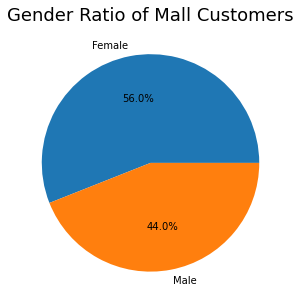

In [11]:
data = df['Gender'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(data.values,labels=data.index,autopct='%.1f%%')
plt.title('Gender Ratio of Mall Customers',fontsize=18)
plt.show()

**Interpretation**: 
- Female customers are more than Male customers.  
- There are 56% of Female customers and 44% of male customers.

### Age Distribution

<AxesSubplot:xlabel='Age', ylabel='Count'>

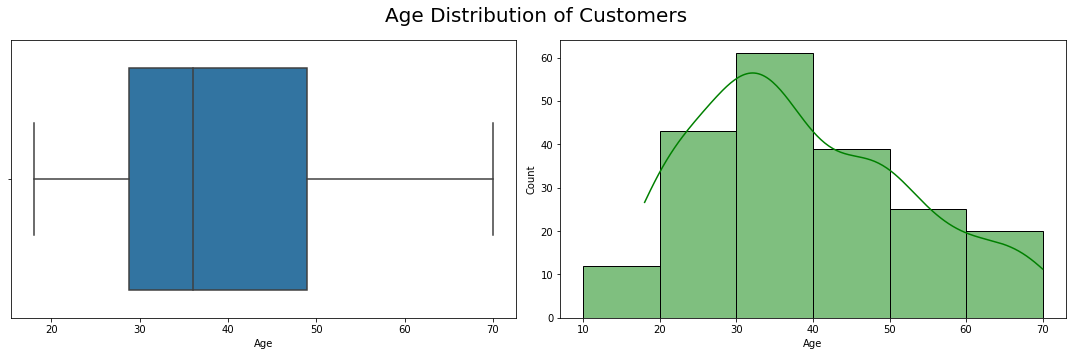

In [12]:
fig,ax = plt.subplots(2,2,tight_layout=True,figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(df['Age'])
plt.suptitle('Age Distribution of Customers',fontsize=20)

plt.subplot(1,2,2)
sb.histplot(df['Age'],kde=True,color='g',bins=[10,20,30,40,50,60,70])

**Interpretation**:
- There are more number of customers of age group between 30 to 50.

### Annual Income Distribution 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

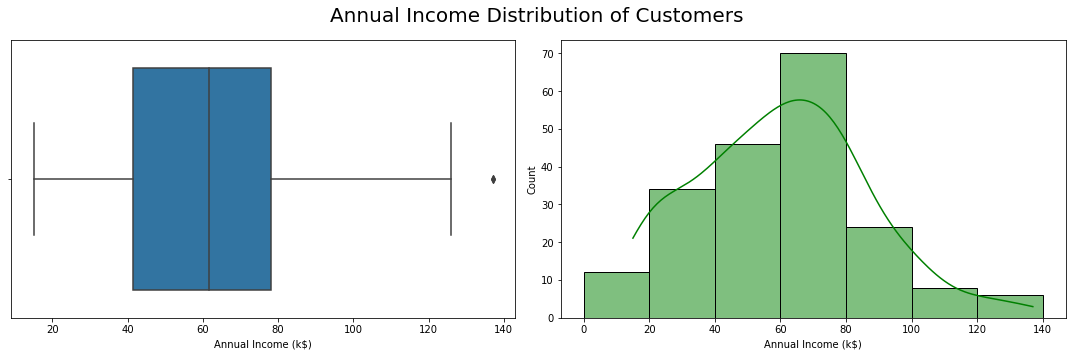

In [13]:
fig,ax = plt.subplots(2,2,tight_layout=True,figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(df['Annual Income (k$)'])
plt.suptitle('Annual Income Distribution of Customers',fontsize=20)

plt.subplot(1,2,2)
sb.histplot(df['Annual Income (k$)'],kde=True,color='g',bins=[0,20,40,60,80,100,120,140])

**Interpretation**:
- Most customers Annual income ranges between 40k to 80k dollars.

### Spending Score Distribution

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

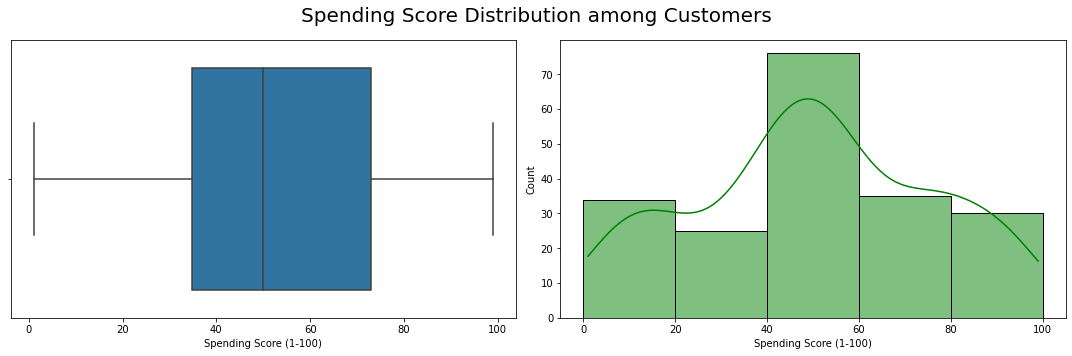

In [14]:
fig,ax = plt.subplots(2,2,tight_layout=True,figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(df['Spending Score (1-100)'])
plt.suptitle('Spending Score Distribution among Customers',fontsize=20)

plt.subplot(1,2,2)
sb.histplot(df['Spending Score (1-100)'],kde=True,color='g',bins=[0,20,40,60,80,100])

**Interpretation**:
- Most customers spending scores are between 35 to 70.

### Ratio of spending score and annual income among genders.

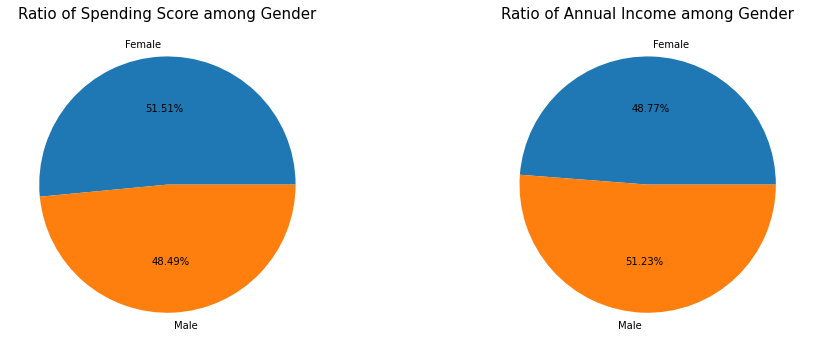

In [15]:
data1 = df.groupby(['Gender'])['Spending Score (1-100)'].mean()
data2 = df.groupby(['Gender'])['Annual Income (k$)'].mean()

fig,ax = plt.subplots(2,2,tight_layout=True,figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(data1.values,labels=data1.index,autopct='%.2f%%')
plt.title('Ratio of Spending Score among Gender',fontsize=15)


plt.subplot(1,2,2)
plt.pie(data2.values,labels=data2.index,autopct='%.2f%%')
plt.title('Ratio of Annual Income among Gender',fontsize=15)
plt.show()

**Interpretation**: 
- The ratio of spending score of female customers are higher than male customers.
- The ratio of Annual Income of female is lower than male customers.
- Eventhough the female customers' annual income is lower their spending score is little higher than male customers.

# Data Preparation for Model:
- As the customer_id and gender columns are irrelevant as we are not seggregating the customers by genderwise ,we are not using those columns for the model.
- There is no huge difference in the ranges of values in columns so data scaling is not required for the model.
- We are using the columns: Age, Annual Income (k$), Spending Score (1-100).

In [16]:
data = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

## DIMENSION REDUCTION ALGORITHM

## PCA (Principal Component Analysis)

In [17]:
values = PCA(n_components=2).fit_transform(data)
values

array([[-3.18705078e+01, -3.30014253e+01],
       [ 7.63396908e-01, -5.68438653e+01],
       [-5.74087256e+01, -1.31229362e+01],
       [-2.16989648e+00, -5.34779049e+01],
       [-3.21749197e+01, -3.03870050e+01],
       [-2.17827777e+00, -5.22265808e+01],
       [-5.90660565e+01, -9.54170669e+00],
       [ 1.23693261e+01, -6.16176843e+01],
       [-6.63156568e+01, -3.21359934e+00],
       [-5.65677534e+00, -4.72664534e+01],
       [-5.82366179e+01, -9.13375312e+00],
       [ 1.46202592e+01, -6.21072940e+01],
       [-5.51612126e+01, -1.00779778e+01],
       [-4.30660584e-03, -5.01134367e+01],
       [-5.27647474e+01, -1.16804199e+01],
       [ 1.94563480e+00, -5.15231943e+01],
       [-3.45062349e+01, -2.37600734e+01],
       [-7.30573032e+00, -4.35158724e+01],
       [-4.12574933e+01, -1.64734320e+01],
       [ 1.61888268e+01, -5.82998775e+01],
       [-3.27403118e+01, -2.13349462e+01],
       [-9.82702739e-01, -4.44533143e+01],
       [-5.78102821e+01, -1.86854579e+00],
       [-1.

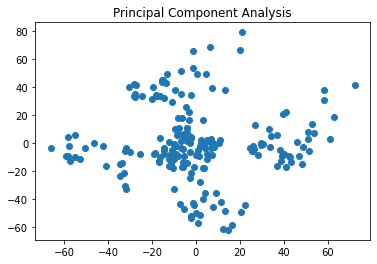

In [18]:
plt.scatter(values[:,0],values[:,1])
plt.title('Principal Component Analysis')
plt.show()

***The features are reduced to 2 components by Feature reduction using PCA (Principal Component Analysis) algorithm.***

## Clustering Algorithms

## KMeans Algorithm with PCA

### Finding Optimum K value for the algorithm

### Elbow method

Text(0.5, 1.0, 'Elbow curve')

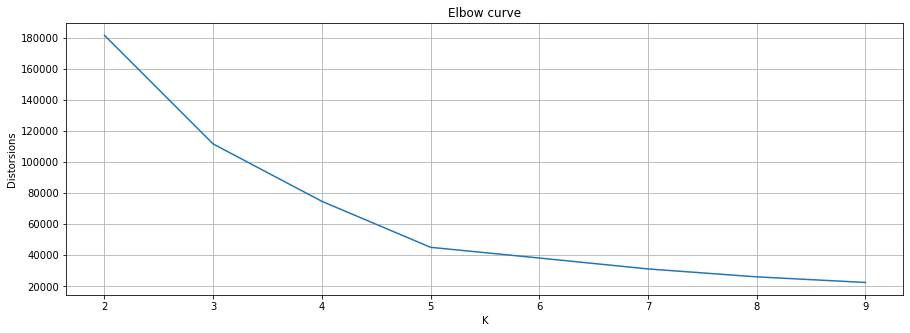

In [19]:
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(values)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')

**We can observe that from k=3 there is an elbow shape with distorsions decreasing.**

### Silhouette score

In [20]:
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(values)
    silhouette_avg = silhouette_score(values, cluster_labels)
    print("For n_clusters =", n_clusters,"and The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and The average silhouette_score is : 0.342494700011012
For n_clusters = 3 and The average silhouette_score is : 0.4510525443868883
For n_clusters = 4 and The average silhouette_score is : 0.4991495294931792
For n_clusters = 5 and The average silhouette_score is : 0.5526250183600322
For n_clusters = 6 and The average silhouette_score is : 0.5364302947370859
For n_clusters = 7 and The average silhouette_score is : 0.5232200976140171
For n_clusters = 8 and The average silhouette_score is : 0.44900520464470306
For n_clusters = 9 and The average silhouette_score is : 0.45288244094337426
For n_clusters = 10 and The average silhouette_score is : 0.453460946296433


***From the silhouette scores we can see that k=5 has a good silhouette score.***

**Interpretation**: On considering both elbow curve and silhoutte scores we can set cluster size (k) as 5.

### Model Building

In [21]:
KMeans_model = KMeans(n_clusters=5)

### Model Fitting

In [22]:
KMeans_model.fit(values)

KMeans(n_clusters=5)

### Model Predictions


In [23]:
k_pred = KMeans_model.predict(values)

In [24]:
# Cluster centroids

cluster_centroid = KMeans_model.cluster_centers_
cluster_centroid

array([[ -4.41034605,  -3.10054946],
       [-10.22346234,  42.33151065],
       [ 41.55109062,   1.86988377],
       [  4.98429835, -46.67348852],
       [-44.38700009, -10.04934895]])

### Silhouette Score

In [25]:
# Calculating Silhouette score
kmeans_score = np.round(silhouette_score(values,k_pred)*100)
kmeans_score

print(f'Silhouette score of KMeans model = {kmeans_score} %')

Silhouette score of KMeans model = 55.0 %


In [26]:
# Adding the predictions along with the data in new dataframe
df_pred = pd.DataFrame(data,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_pred['Kmeans_pred'] = k_pred
df_pred.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_pred
0,19,15,39,4
1,21,15,81,3


### Visualizing the clusters

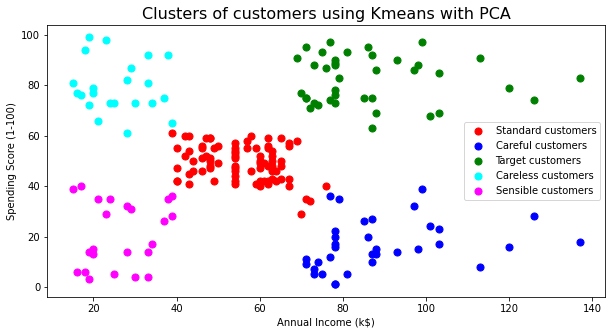

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(data[k_pred == 0, 1], data[k_pred == 0, 2], s = 50, c = 'red', label = 'Standard customers')
plt.scatter(data[k_pred == 1, 1], data[k_pred == 1, 2], s = 50, c = 'blue', label = 'Careful customers')
plt.scatter(data[k_pred == 2, 1], data[k_pred == 2, 2], s = 50, c = 'green', label = 'Target customers')
plt.scatter(data[k_pred == 3, 1], data[k_pred == 3, 2], s = 50, c = 'cyan', label = 'Careless customers')
plt.scatter(data[k_pred == 4, 1], data[k_pred == 4, 2], s = 50, c = 'magenta', label = 'Sensible customers')
plt.title('Clusters of customers using Kmeans with PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Interpretation**:
- The green cluster indicates the target customers whose Annual income and spending scores are high.
- The red cluster indicates the Standard customers whose Annual Income and Spending scores is moderate.
- The blue cluster indicates Careful customers whose Annual Income is high but Spending Score is low.
- The cyan cluster indicates the Careless customers whose Annual income is low but Spending score is high.
- The magenta cluster indicates the Sensible customers whose Annual Income and Spending Scores are low.

## KMeans without Dimension reduction

### Elbow method

Text(0.5, 1.0, 'Elbow curve')

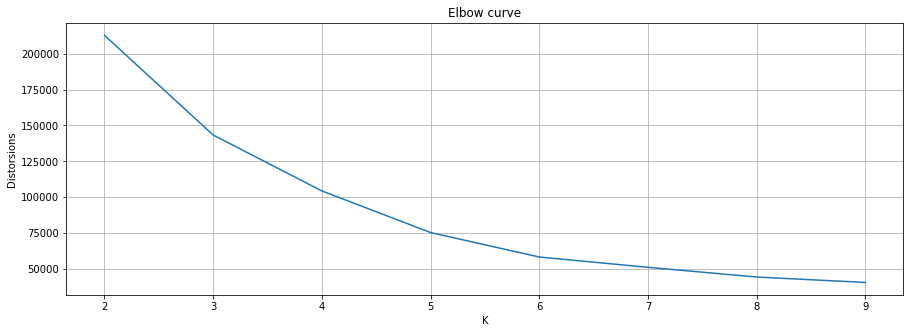

In [28]:
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')

***From k=3 there is an elbow curve decrease of distorsions.***

### Silhouette Scores

In [29]:
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,"and The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and The average silhouette_score is : 0.293166070535953
For n_clusters = 3 and The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 and The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 and The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 and The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 and The average silhouette_score is : 0.44125523526699084
For n_clusters = 8 and The average silhouette_score is : 0.42790288922594905
For n_clusters = 9 and The average silhouette_score is : 0.4134438886098646
For n_clusters = 10 and The average silhouette_score is : 0.3814902498722627


***The Silhouette score is high when clusters are set as 5 and 6.***

**Interpretation**: On comparing both elbow and silhouette score for the model we can can set n clusters as 5.

### Model Building

In [30]:
kmeans_model1 = KMeans(n_clusters=5)

### Model Fitting

In [31]:
kmeans_model1.fit(data)

KMeans(n_clusters=5)

### Model Predictions

In [32]:
k_pred1 = kmeans_model1.predict(data)
k_pred1

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

### Silhouette score

In [33]:
kmeans_score1 = np.round(silhouette_score(data,k_pred1)*100)
kmeans_score1

print(f'Silhouette score of KMeans model = {kmeans_score1} %')

Silhouette score of KMeans model = 44.0 %


In [34]:
# Adding predicted values to dataframe
df_pred1 = pd.DataFrame(data,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_pred1['Kmeans_pred'] = k_pred1
df_pred1.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_pred
0,19,15,39,2
1,21,15,81,4


### Visualizing the clusters

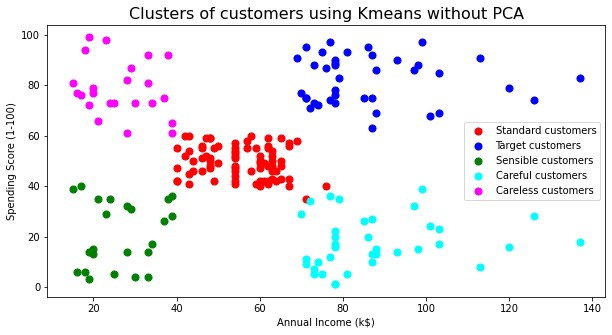

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(data[k_pred1 == 0, 1], data[k_pred1 == 0, 2], s = 50, c = 'red', label = 'Standard customers')
plt.scatter(data[k_pred1 == 1, 1], data[k_pred1 == 1, 2], s = 50, c = 'blue', label = 'Target customers')
plt.scatter(data[k_pred1 == 2, 1], data[k_pred1 == 2, 2], s = 50, c = 'green', label = 'Sensible customers')
plt.scatter(data[k_pred1 == 3, 1], data[k_pred1 == 3, 2], s = 50, c = 'cyan', label = 'Careful customers')
plt.scatter(data[k_pred1 == 4, 1], data[k_pred1 == 4, 2], s = 50, c = 'magenta', label = 'Careless customers')
plt.title('Clusters of customers using Kmeans without PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Interpretation**:
- The blue clusters are the target customers whose Annual Income and Spending Scores are high.
- The red clusters are the Standard customers whose Annual Income and Spending scores are moderate.
- The cyan cluster indicates the Careful customers whose Annual Income is high but Spending Score is low.
- The magenta cluster indicates the Careless customers whose Annual Income is low but Spending Score is high.
- The green cluster indicates the Sensible customers whose Annual Income and Spending scores are low.

### Interpretation:
- Using KMeans model with dimension reduction and without dimension reduction, the clusters formed are good and interpretable.
- The Silhouette score of Kmeans model with dimension reduction is 55%.
- The Silhouette score of Kmeans model without dimension reduction is 44%.

## Hierarchical Clustering 

## Agglomerative Model with PCA

### Dendrogram

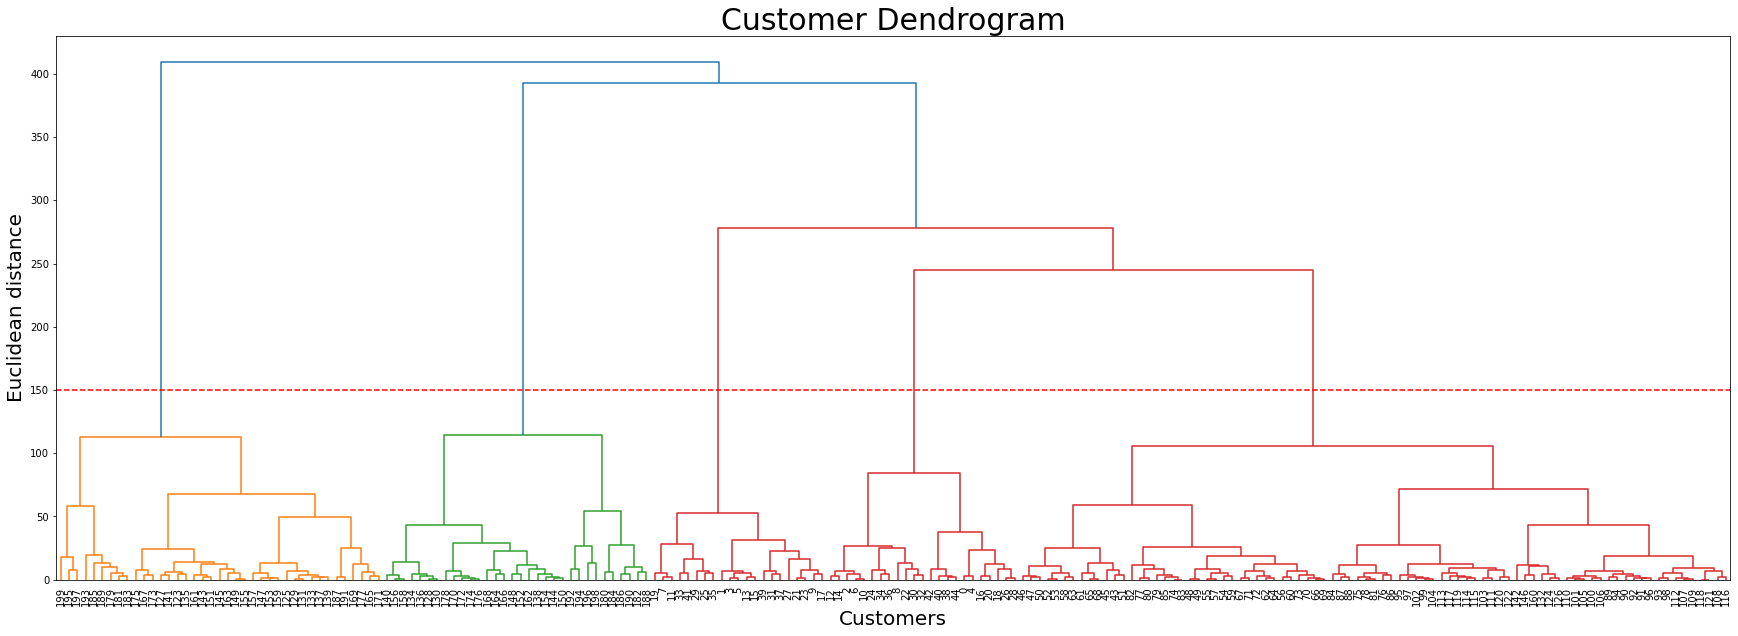

In [36]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(values, method = 'ward'))
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

**Interpretation**: From the dendrogram we can set cluster size as 5.

### Model Building

In [37]:
agg_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

### Model Fitting

In [38]:
agg_model.fit(values)

AgglomerativeClustering(n_clusters=5)

### Model Prediction

In [39]:
agg_pred = agg_model.fit_predict(values)
agg_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [40]:
# Adding the predicted values to the dataframe
df_pred['agg_pred'] = agg_pred
df_pred.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_pred,agg_pred
0,19,15,39,4,4
1,21,15,81,3,3


### Silhouette Score

In [41]:
agg_score = np.round(silhouette_score(values,agg_pred)*100)
agg_score

print(f'Silhouette score of Agglomerative model = {agg_score} %')

Silhouette score of Agglomerative model = 55.0 %


### Visualization of Clusters

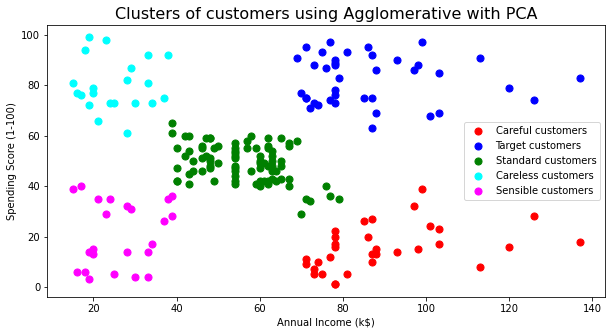

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(data[agg_pred == 0, 1], data[agg_pred == 0, 2], s = 50, c = 'red', label = 'Careful customers')
plt.scatter(data[agg_pred == 1, 1], data[agg_pred == 1, 2], s = 50, c = 'blue', label = 'Target customers')
plt.scatter(data[agg_pred == 2, 1], data[agg_pred == 2, 2], s = 50, c = 'green', label = 'Standard customers')
plt.scatter(data[agg_pred == 3, 1], data[agg_pred == 3, 2], s = 50, c = 'cyan', label = 'Careless customers')
plt.scatter(data[agg_pred == 4, 1], data[agg_pred == 4, 2], s = 50, c = 'magenta', label = 'Sensible customers')
plt.title('Clusters of customers using Agglomerative with PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Interpretation**:
- The blue cluster indicates the Target customers whose Annual income and Spending Scores are high.
- The green cluster indicates the Standard customers whose Annual income and Spending scores are moderate.
- The cyan cluster indicates the careless customers whose Annual Income is low but Spending score is high.
- The magenta cluster indicates the sensible customers whose Annual income and Spending scores are low.
- The red cluster indicates the careful customers whose Annual Income is high but spending score is low.

## Agglomerative clustering without Dimension reduction

### Dendrogram

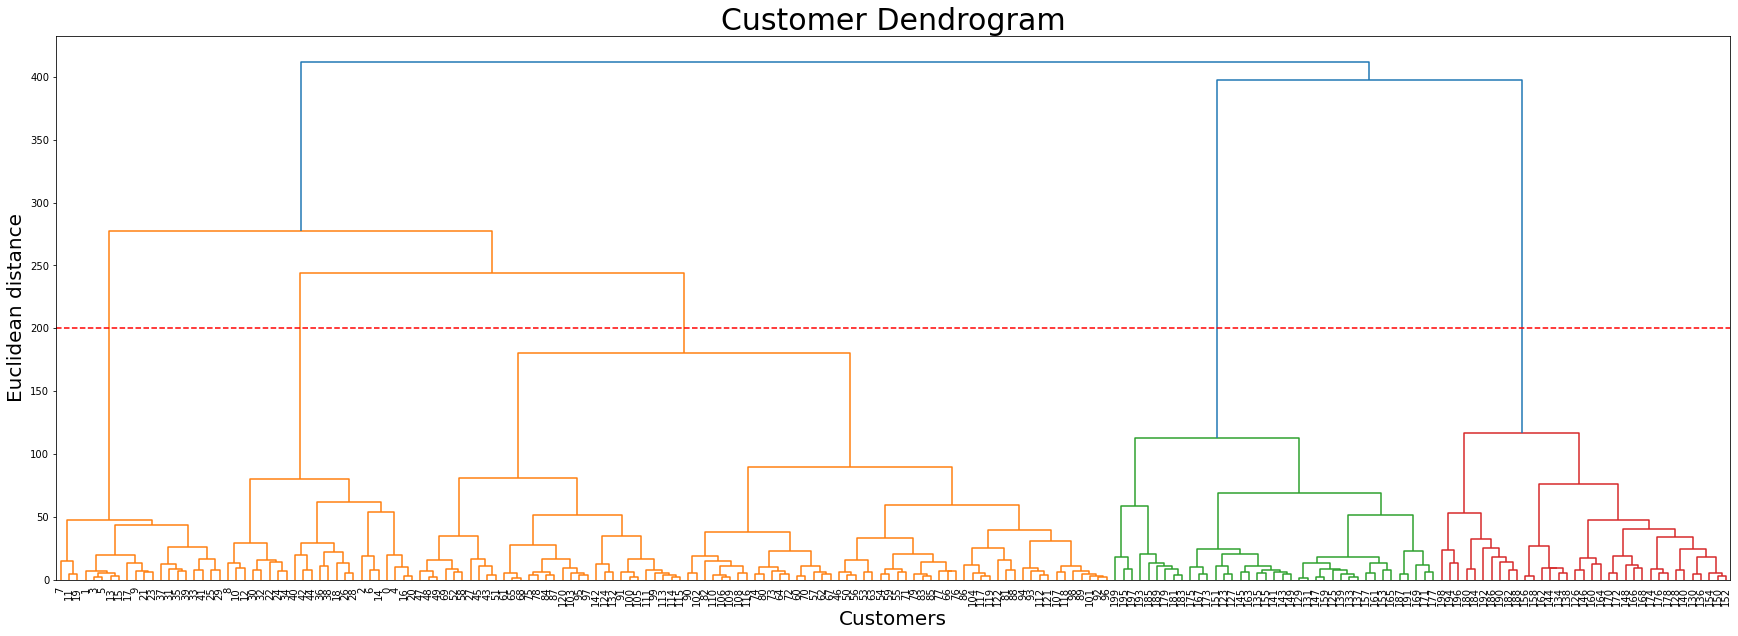

In [43]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

**Interpretation**: From the dendogram we can set cluster size as 5

### Model Building

In [44]:
agg_model1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

### Model Fitting

In [45]:
agg_model1.fit(data)

AgglomerativeClustering(n_clusters=5)

### Model Prediction

In [46]:
agg_pred1 = agg_model1.fit_predict(data)
agg_pred1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [47]:
# Adding the predicted values to dataframe
df_pred1['agg_pred'] = agg_pred1
df_pred1.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_pred,agg_pred
0,19,15,39,2,4
1,21,15,81,4,3


### Silhouette score

In [48]:
agg_score1 = np.round(silhouette_score(data,agg_pred1)*100)
agg_score1

print(f'Silhouette score of Agglomerative model = {agg_score1} %')

Silhouette score of Agglomerative model = 44.0 %


### Visualization of Clusters

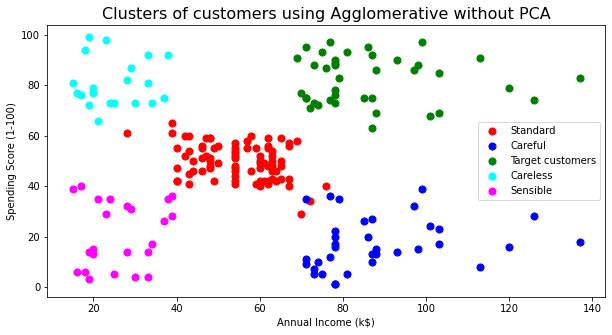

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(data[agg_pred1 == 0, 1], data[agg_pred1 == 0, 2], s = 50, c = 'red', label = 'Standard')
plt.scatter(data[agg_pred1 == 1, 1], data[agg_pred1 == 1, 2], s = 50, c = 'blue', label = 'Careful')
plt.scatter(data[agg_pred1 == 2, 1], data[agg_pred1 == 2, 2], s = 50, c = 'green', label = 'Target customers')
plt.scatter(data[agg_pred1 == 3, 1], data[agg_pred1 == 3, 2], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(data[agg_pred1 == 4, 1], data[agg_pred1 == 4, 2], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers using Agglomerative without PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Interpretation**:
- The green cluster indicates the Target customers whose Annual income and Spending Scores are high.
- The red cluster indicates the Standard customers whose Annual income and Spending scores are moderate.
- The cyan cluster indicates the careless customers whose Annual Income is low but Spending score is high.
- The magenta cluster indicates the sensible customers whose Annual income and Spending scores are low.
- The blue cluster indicates the careful customers whose Annual Income is high but spending score is low.

### Interpretation:
- The clusters formed using Agglomerative clustering model with dimension reduction are very well seggregated and well interpretable.
- The Silhouette Score of Agglomerative model with dimension reduction is 55%.
- The Silhouette score of Agglomerative model without dimension reduction is 44%.

## DBSCAN Algorithm

## DBSCAN Algorithm with PCA

### K Distance graph for optimal eps value

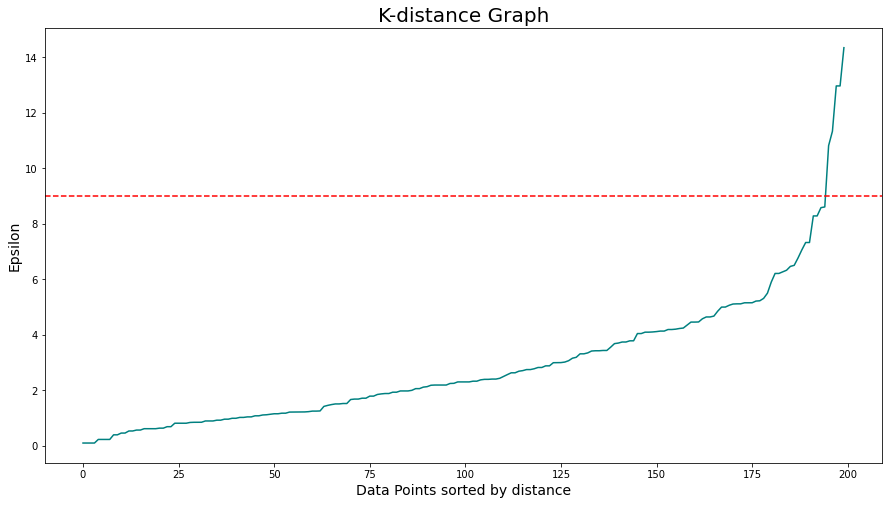

In [50]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2).fit(values)
distances, indices = neigh.kneighbors(values)

 # Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances,color='teal')
plt.axhline(y=9, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

**We can set eps value as 9 for the model.** 

### Finding Optimal min samples

In [51]:
eps=9
for min_samples in range(2,20,3):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(values)

    x= cluster_labels +2
    y = np.bincount(x) 
    ii = np.nonzero(y)[0]  
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 9 | min_samples=  2 | obtained clustering:  [(1, 5), (2, 139), (3, 12), (4, 3), (5, 33), (6, 2), (7, 2), (8, 2), (9, 2)]
eps= 9 | min_samples=  5 | obtained clustering:  [(1, 24), (2, 15), (3, 12), (4, 117), (5, 32)]
eps= 9 | min_samples=  8 | obtained clustering:  [(1, 50), (2, 11), (3, 8), (4, 86), (5, 24), (6, 21)]
eps= 9 | min_samples=  11 | obtained clustering:  [(1, 79), (2, 82), (3, 16), (4, 23)]
eps= 9 | min_samples=  14 | obtained clustering:  [(1, 119), (2, 81)]
eps= 9 | min_samples=  17 | obtained clustering:  [(1, 120), (2, 80)]


**We can set min samples as 5 for the model.**

### Model Building & Fitting

In [52]:
dbscan_model = DBSCAN(eps=9,min_samples=5)
dbscan_model.fit(values)

DBSCAN(eps=9)

### Model Prediction

In [53]:
dbscan_pred = dbscan_model.fit_predict(values)
dbscan_pred

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2, -1,  2,  0,  1,  0,  1, -1,
        1,  0,  1,  0,  2,  0,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3, -1,  3,  2,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

### Silhouette score

In [54]:
dbscan_score = np.round(silhouette_score(values,dbscan_pred)*100)

print(f'Silhouette score of DBSCAN model with dimension reduction = {dbscan_score} %')

Silhouette score of DBSCAN model with dimension reduction = 36.0 %


In [55]:
# Adding predicted value to dataframe
df_pred['dbscan_pred']=dbscan_pred
df_pred.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_pred,agg_pred,dbscan_pred
0,19,15,39,4,4,-1
1,21,15,81,3,3,0


In [56]:
# prediction counts
df_pred['dbscan_pred'].value_counts()

 2    117
 3     32
-1     24
 0     15
 1     12
Name: dbscan_pred, dtype: int64

### Visualization of Clusters

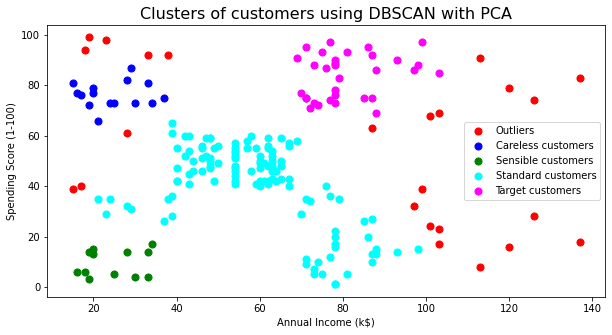

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(data[dbscan_pred == -1, 1], data[dbscan_pred == -1, 2], s = 50, c = 'red', label = 'Outliers')
plt.scatter(data[dbscan_pred == 0, 1], data[dbscan_pred == 0, 2], s = 50, c = 'blue', label = 'Careless customers')
plt.scatter(data[dbscan_pred == 1, 1], data[dbscan_pred == 1, 2], s = 50, c = 'green', label = 'Sensible customers')
plt.scatter(data[dbscan_pred == 2, 1], data[dbscan_pred == 2, 2], s = 50, c = 'cyan', label = 'Standard customers')
plt.scatter(data[dbscan_pred == 3, 1], data[dbscan_pred == 3, 2], s = 50, c = 'magenta', label = 'Target customers')
plt.title('Clusters of customers using DBSCAN with PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Interpretation**:
- The red dots indicate the Outliers in the customers in which some customers can be considered as target customers as they have high income and spending score.
- The blue cluster indicates the Careless customers whose Annual Income is low but their spending score is high.
- The cyan cluster indicates the Standard customers in which some customers have high annual income but low spending score and vice versa.
- The green cluster indicates the sensible customers whose annual income and spending score is low.
- The magenta cluster indicates out target customers whose annual income and spending score is high.

## DBSCAN Algorithm without Dimension Reduction

### K-Distance graph for optimal eps value

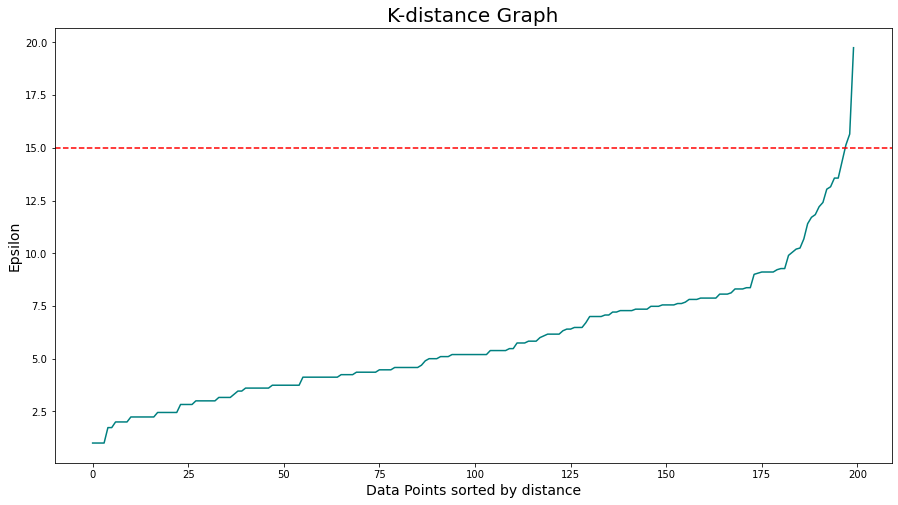

In [58]:
neigh = NearestNeighbors(n_neighbors=2).fit(data)
distances, indices = neigh.kneighbors(data)

 # Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances,color='teal')
plt.axhline(y=15, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

**We can set eps value as 15 for our model**

### Finding Optimal min samples

In [59]:
eps=15
for min_samples in range(2,20,3):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(values)

    x= cluster_labels +2
    y = np.bincount(x) 
    ii = np.nonzero(y)[0]  
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 15 | min_samples=  2 | obtained clustering:  [(2, 200)]
eps= 15 | min_samples=  5 | obtained clustering:  [(1, 6), (2, 194)]
eps= 15 | min_samples=  8 | obtained clustering:  [(1, 10), (2, 190)]
eps= 15 | min_samples=  11 | obtained clustering:  [(1, 18), (2, 171), (3, 11)]
eps= 15 | min_samples=  14 | obtained clustering:  [(1, 31), (2, 22), (3, 116), (4, 31)]
eps= 15 | min_samples=  17 | obtained clustering:  [(1, 51), (2, 118), (3, 31)]


**We can set optimal min samples as 5 for our model.**

### Model Building & Fitting

In [60]:
dbscan_model1 = DBSCAN(eps=15,min_samples=5)
dbscan_model1.fit(data)

DBSCAN(eps=15)

### Model Predictions

In [61]:
dbscan_pred1 = dbscan_model1.fit_predict(data)
dbscan_pred1

array([-1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  1,  0,
        1,  0,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

### Silhouette score

In [62]:
dbscan_score1 = np.round(silhouette_score(data,dbscan_pred1)*100)

print(f'Silhouette score of dbscan model without dimension reduction = {dbscan_score1} %')

Silhouette score of dbscan model without dimension reduction = 28.0 %


In [63]:
# Adding predicted values to dataframe
df_pred1['dbscan_pred']=dbscan_pred1
df_pred1.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_pred,agg_pred,dbscan_pred
0,19,15,39,2,4,-1
1,21,15,81,4,3,0


In [64]:
# Prediction counts
df_pred1['dbscan_pred'].value_counts()

 0    153
 1     35
-1     12
Name: dbscan_pred, dtype: int64

### Visualization of Clusters

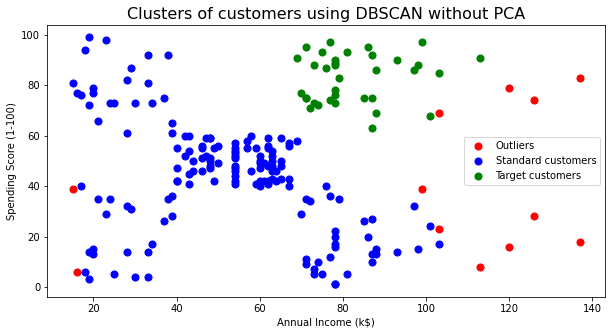

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(data[dbscan_pred1 == -1, 1], data[dbscan_pred1 == -1, 2], s = 50, c = 'red', label = 'Outliers')
plt.scatter(data[dbscan_pred1 == 0, 1], data[dbscan_pred1 == 0, 2], s = 50, c = 'blue', label = 'Standard customers')
plt.scatter(data[dbscan_pred1 == 1, 1], data[dbscan_pred1 == 1, 2], s = 50, c = 'green', label = 'Target customers')
plt.title('Clusters of customers using DBSCAN without PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Interpretation**:
- The red dots indicate the outlier customers in which some customers can be considered as target customers having high income and spending score.
- The green cluster indicates our target customers whose income ranges from moderate to high salary and high spending score.
- The blue cluster indicates standard customers where some customers have low salary and high spending score and vice versa.

### Interpretation:
- The clusters formed by DBSCAN model are not so good and interpretable.
- The Silhouette score of dbscan model with dimension reduction is 36%.
- he Silhouette score of dbscan model without dimension reduction is 28%.

## CONCLUSION:

In [66]:
print('Silhouette scores of Models:')
pd.DataFrame([[kmeans_score,kmeans_score1],[agg_score,agg_score1],[dbscan_score,dbscan_score1]],columns=['With Dimension Reduction','Without Dimension Reduction'],index=['KMeans clustering','Hierarchical clustering','DBSCAN clustering'])

Silhouette scores of Models:


,With Dimension Reduction,Without Dimension Reduction
KMeans clustering,55.0,44.0
Hierarchical clustering,55.0,44.0
DBSCAN clustering,36.0,28.0


**Interpretation**: 
- Models with Dimension reduction have good silhouette score than model without dimension reduction.
- DBSCAN clustering has the least Silhoutte score than KMeans and Hierarchical clustering.
- KMeans and Hierarchical clustering has about 55 % Silhouette score.

## Comparing the Cluster Formations of models

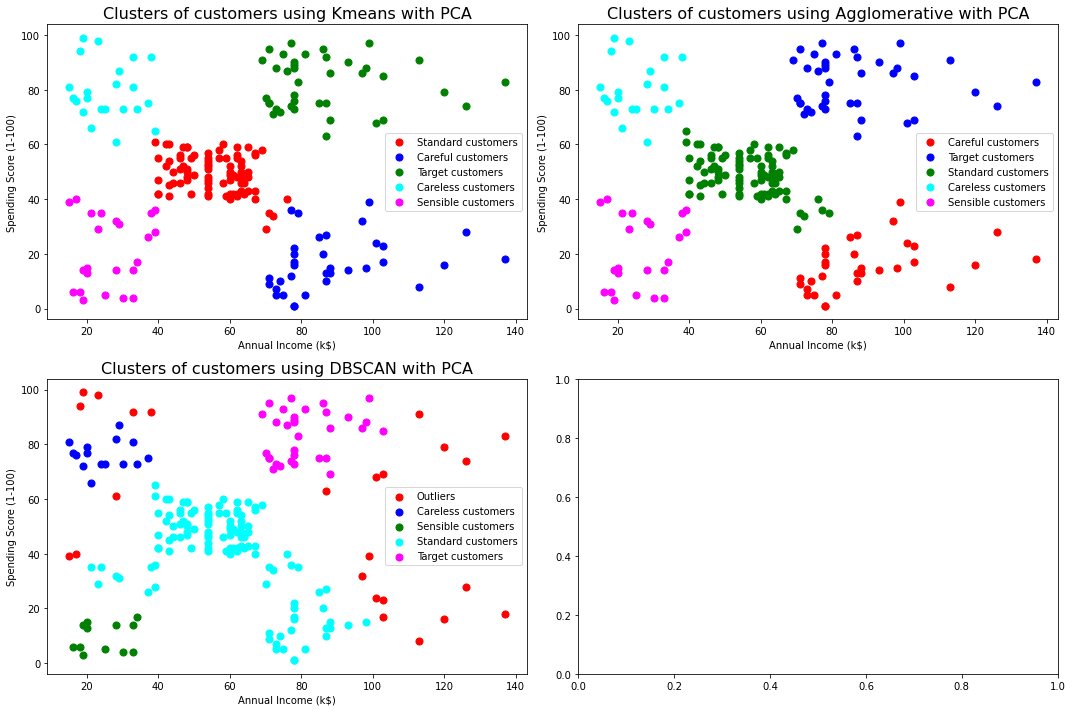

In [71]:
fig,ax = plt.subplots(2,2,tight_layout=True,figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(data[k_pred == 0, 1], data[k_pred == 0, 2], s = 50, c = 'red', label = 'Standard customers')
plt.scatter(data[k_pred == 1, 1], data[k_pred == 1, 2], s = 50, c = 'blue', label = 'Careful customers')
plt.scatter(data[k_pred == 2, 1], data[k_pred == 2, 2], s = 50, c = 'green', label = 'Target customers')
plt.scatter(data[k_pred == 3, 1], data[k_pred == 3, 2], s = 50, c = 'cyan', label = 'Careless customers')
plt.scatter(data[k_pred == 4, 1], data[k_pred == 4, 2], s = 50, c = 'magenta', label = 'Sensible customers')
plt.title('Clusters of customers using Kmeans with PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(data[agg_pred == 0, 1], data[agg_pred == 0, 2], s = 50, c = 'red', label = 'Careful customers')
plt.scatter(data[agg_pred == 1, 1], data[agg_pred == 1, 2], s = 50, c = 'blue', label = 'Target customers')
plt.scatter(data[agg_pred == 2, 1], data[agg_pred == 2, 2], s = 50, c = 'green', label = 'Standard customers')
plt.scatter(data[agg_pred == 3, 1], data[agg_pred == 3, 2], s = 50, c = 'cyan', label = 'Careless customers')
plt.scatter(data[agg_pred == 4, 1], data[agg_pred == 4, 2], s = 50, c = 'magenta', label = 'Sensible customers')
plt.title('Clusters of customers using Agglomerative with PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data[dbscan_pred == -1, 1], data[dbscan_pred == -1, 2], s = 50, c = 'red', label = 'Outliers')
plt.scatter(data[dbscan_pred == 0, 1], data[dbscan_pred == 0, 2], s = 50, c = 'blue', label = 'Careless customers')
plt.scatter(data[dbscan_pred == 1, 1], data[dbscan_pred == 1, 2], s = 50, c = 'green', label = 'Sensible customers')
plt.scatter(data[dbscan_pred == 2, 1], data[dbscan_pred == 2, 2], s = 50, c = 'cyan', label = 'Standard customers')
plt.scatter(data[dbscan_pred == 3, 1], data[dbscan_pred == 3, 2], s = 50, c = 'magenta', label = 'Target customers')
plt.title('Clusters of customers using DBSCAN with PCA',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### CONCLUSION:
- Comparing the cluster formation and its segregations Hierarchical clustering has well segregated clusters and we can cluster mall customers in well manner.
- KMeans Model also has good segregation of clusters but comparing to hierarchical clusters , the clusters are well segregated in agglomerative model.
- In DBSCAN the clusters eventhough it identifies outliers, the mall customers who are outliers should also be considered to implement some innovative business plans.

### BUSINESS IMPLEMENTATION: 
Using Agglomerative clustering model the customers can be identified according to the clusters and helps to identify those customers who would be interested in certain products, offers and services so that the stores can strategize its offerings in such a way that it targets only right customers for specific products.